<a href="https://colab.research.google.com/github/sarahlai30/Machine-Learning-INDE-577/blob/main/The_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Perceptron
The perceptron is an artifical neuron that performs binary classification that maps input features to an output decision. It is also known as a single layer neural network.

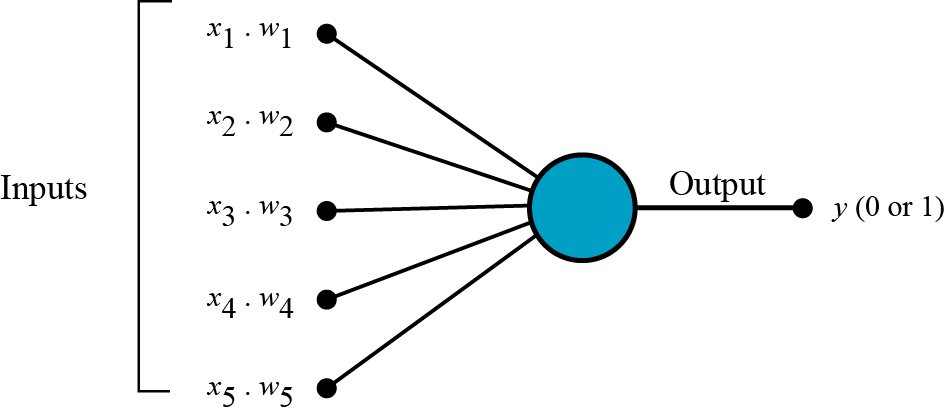

We will implement and train this model on the Breast Cancer Dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Binary target: 0 = malignant, 1 = benign
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We transform y even though it is already binary classified by 0 and 1 because often in machine learning, especially in certain algorithms (like Support Vector Machines or perceptrons), having target values as -1 and 1 instead of 0 and 1 is useful for mathematical calculations or the decision boundary.

The perceptron is able to take in any number of feature measurments, but for simplicity we focus on just two feature measurements, "mean radius" and "mean perimeter".

In [ ]:
X = X[["mean area", "mean compactness"]].values
# Map target values: 0 -> -1, 1 -> 1
y = np.where(y == 0, -1, 1)


This class implements a simple perceptron model for binary classification. The algorithm adjusts the weights iteratively based on the classification errors in each epoch.

Attributes:

*   eta (float): The learning rate, which controls how much the weights are adjusted with each training sample. Typical values are between 0.0 -  1.0.
*   epochs (int): The maximum number of passes over the training dataset.
* w_ (numpy array): The weight vector, initialized with small random values. It includes an extra weight for the bias term.
* errors_ (list): A record of the number of misclassifications (errors) for each epoch, used to monitor the performance during training.


In [ ]:
class Perceptron:
    def __init__(self, eta=0.5, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        # Initialize weights to small random values
        self.w_ = np.random.randn(1 + X.shape[1]) * 0.01
        self.errors_ = [] # Initialize a list to keep track of errors

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # Update rule based on (target - prediction)
                update = self.eta * (target - self.predict(xi))
                self.w_[:-1] += update * xi
                self.w_[-1] += update
                errors += int(update != 0)

            # Append the number of misclassifications
            self.errors_.append(errors)

            # Stop if no errors
            if errors == 0:
                break

        return self

    def net_input(self, X):
        # Compute the net input
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        # Activation function (sign function for perceptron)
        return np.where(self.net_input(X) >= 0.0, 1, -1)


We scale the features before training the Perceptron. This is important for models like the Perceptron, which are sensitive to the scale of input data. We instantiate an instance of the Perceptron class and train this instance on  10,000 epochs.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = Perceptron(eta=0.009, epochs=1000)  # Lower learning rate and more epochs
clf.train(X_scaled, y)

# Train the Perceptron on the dataset
clf.train(X_scaled, y)

After training, we can call the Perceptron class predict method to evaluate the accuracy of the current predictions given input features.

In [ ]:
y_hat = clf.predict(X_scaled)
accuracy = np.mean(y == y_hat)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 91.21%


We can visualize the decision boundary to show how the perceptron classifier divides the feature space into regions corresponding to different classes.

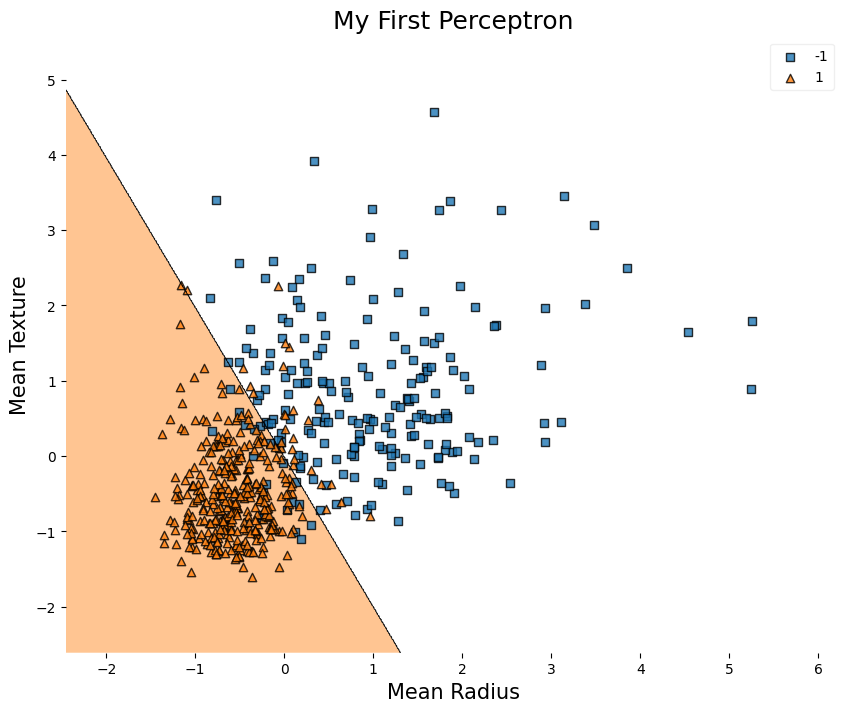

In [ ]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X_scaled, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("Mean Radius", fontsize = 15)
plt.ylabel("Mean Texture", fontsize = 15)
plt.show()

To help us understand how well the Perceptron is learning as it updates its weights, we can viusalize a learning curve that shows us the number of misclassifications the Perceptron makes during each iteration (epoch) of training.

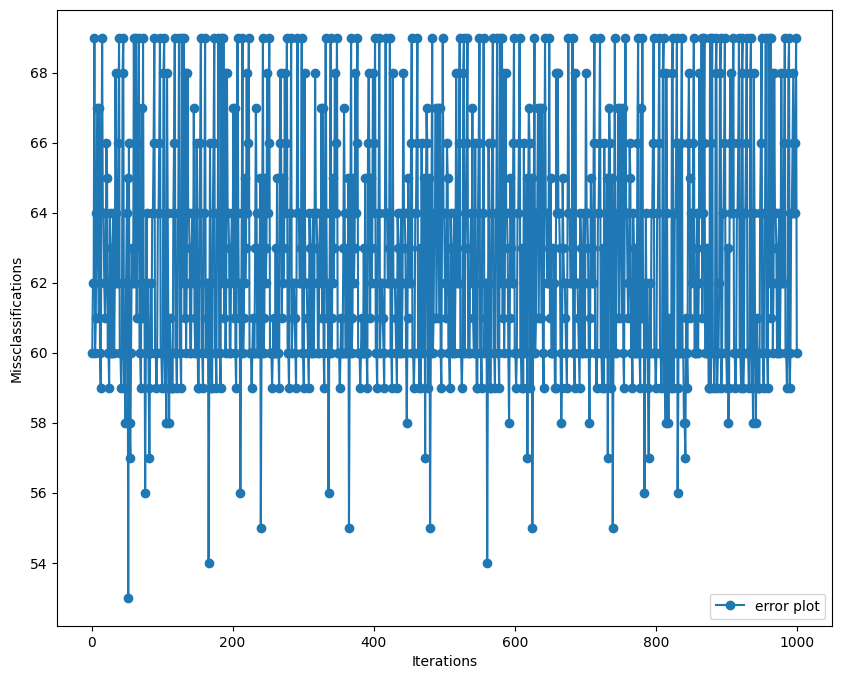

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_,
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

The perceptron model provides an efficient, iterative method to learn a linear decision boundary by adjusting weights based on misclassified examples. However, its performance is limited to linearly separable datasets. If the data is not linearly separable, it will fail to converge and oscillate indefinitely.